# Time Series Decomposition

In [1]:
import sys
from utils import *
from ipywidgets import interact

In [2]:
import warnings
warnings.simplefilter('ignore')

### Population adjustments

In [3]:
global_economy = pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\tsibbledata\global_economy.csv')

In [4]:
global_economy

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
0,Afghanistan,AFG,1960,5.377778e+08,NaN,NaN,7.024793,4.132233,8996351.0
1,Afghanistan,AFG,1961,5.488889e+08,NaN,NaN,8.097166,4.453443,9166764.0
2,Afghanistan,AFG,1962,5.466667e+08,NaN,NaN,9.349593,4.878051,9345868.0
3,Afghanistan,AFG,1963,7.511112e+08,NaN,NaN,16.863910,9.171601,9533954.0
4,Afghanistan,AFG,1964,8.000000e+08,NaN,NaN,18.055555,8.888893,9731361.0
...,...,...,...,...,...,...,...,...,...
15145,Zimbabwe,ZWE,2013,1.909102e+10,1.989493,109.079488,36.668735,21.987759,15054506.0
15146,Zimbabwe,ZWE,2014,1.949552e+10,2.376929,108.847215,33.741470,20.930146,15411675.0
15147,Zimbabwe,ZWE,2015,1.996312e+10,1.779873,106.224541,37.588635,19.160176,15777451.0
15148,Zimbabwe,ZWE,2016,2.054868e+10,0.755869,104.560626,31.275493,19.943532,16150362.0


In [5]:
global_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     15150 non-null  object 
 1   Code        15150 non-null  object 
 2   Year        15150 non-null  int64  
 3   GDP         11828 non-null  float64
 4   Growth      11394 non-null  float64
 5   CPI         7670 non-null   float64
 6   Imports     10596 non-null  float64
 7   Exports     10587 non-null  float64
 8   Population  15147 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
global_economy.describe()

,Year,GDP,Growth,CPI,Imports,Exports,Population
count,15150.000000,1.182800e+04,11394.000000,7.670000e+03,10596.000000,10587.000000,1.514700e+04
mean,1988.570231,1.034149e+12,3.908566,5.692958e+01,38.032427,33.387870,2.060462e+08
std,16.741957,4.664097e+12,5.881102,7.678535e+01,25.799312,25.796417,6.793067e+08
min,1960.000000,8.824448e+06,-64.047107,3.546558e-14,0.000000,0.000000,4.279000e+03
25%,1974.000000,2.155244e+09,1.617493,1.346375e+01,21.613957,17.541905,9.250650e+05
50%,1989.000000,1.483380e+10,3.912786,5.385552e+01,31.133204,26.948591,6.344722e+06
75%,2003.000000,1.839065e+11,6.242109,9.028089e+01,49.080767,42.250264,4.219871e+07
max,2017.000000,8.073758e+13,149.972963,4.583705e+03,427.576471,433.223529,7.530360e+09


In [7]:
aus_economy = global_economy.query("Country == 'Australia'").set_index('Year')

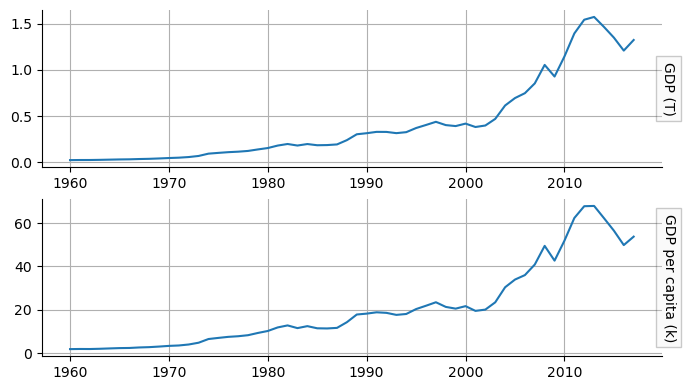

In [8]:
fig, axs = plt.subplots(2)
axs[0].plot(aus_economy.GDP / 1e12)
rlabel(axs[0], 'GDP (T)')
axs[1].plot(aus_economy.GDP / aus_economy.Population / 1e3)
rlabel(axs[1], 'GDP per capita (k)')
for ax in axs:
    ax.grid()

### Inflation adjustments

In [9]:
retail = (pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\tsibbledata\aus_retail.csv', parse_dates=['Month'])
          .query("Industry == 'Newspaper and book retailing'")
          .pipe(compute, lambda x: dict(Year = x.Month.dt.year))
          .groupby('Industry Year'.split())
          .agg(dict(Turnover=sum))
          .reset_index())
retail.head()

,Industry,Year,Turnover
0,Newspaper and book retailing,1982,1263.0
1,Newspaper and book retailing,1983,1799.5
2,Newspaper and book retailing,1984,2011.3
3,Newspaper and book retailing,1985,2108.7
4,Newspaper and book retailing,1986,2263.3


In [10]:
d = (retail
     .set_index('Year')
     .join(aus_economy)
     .pipe(compute, lambda x: dict(Adjusted_Turnover = x.Turnover/x.CPI)))

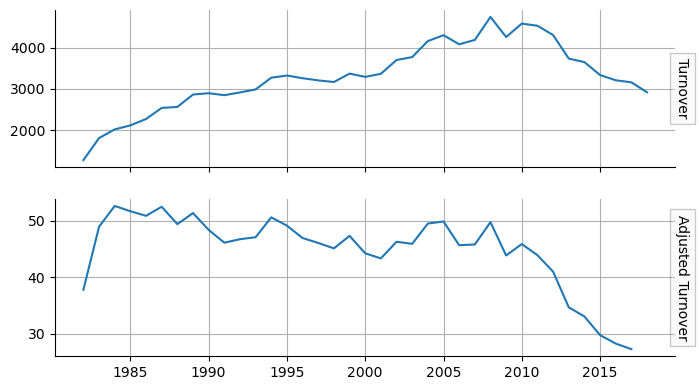

In [11]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(d.Turnover)
rlabel(axs[0], 'Turnover')
axs[1].plot(d.Adjusted_Turnover)
rlabel(axs[1], 'Adjusted Turnover')
for ax in axs:
    ax.grid()

### Mathematical transformations

In [12]:
data = pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\tsibbledata\aus_production.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quarter      218 non-null    object 
 1   Beer         218 non-null    int64  
 2   Tobacco      194 non-null    float64
 3   Bricks       198 non-null    float64
 4   Cement       218 non-null    int64  
 5   Electricity  218 non-null    int64  
 6   Gas          218 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.1+ KB


In [14]:
aus_prod = (data
            .assign(Date=pd.to_datetime(data.Quarter.str.replace(' ', '')))
            .pipe(compute, lambda x: dict(Year=x.Date.dt.year))
            .set_index('Date')
            .drop(columns='Year'.split()))

In [15]:
f = lambda lam: stats.boxcox(aus_prod.Gas, lam)

@interact(lam=(-1, 2, .1))
def update(lam=1):
    fig, ax = plt.subplots()
    ax.plot(aus_prod.index, stats.boxcox(aus_prod.Gas, lam))
    ax.set_title(' ')
    fig.text(.01, .5, 'Transformed gas production', rotation=90, ha='left', va='center')
    ax.grid()
    fig.subplots_adjust(left=.1, right=.95, bottom=.1)

interactive(children=(FloatSlider(value=1.0, description='lam', max=2.0, min=-1.0), Output()), _dom_classes=('…

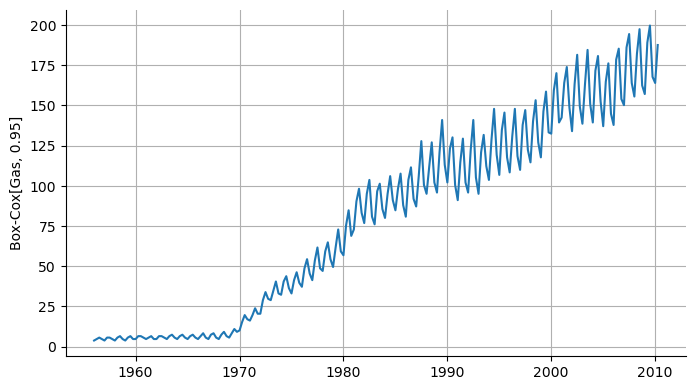

In [16]:
lam = stats.boxcox_normmax(aus_prod.Gas)
fig, ax = plt.subplots()
ax.plot(aus_prod.index, stats.boxcox(aus_prod.Gas, lam))
ax.set(ylabel=f'Box-Cox[Gas, {lam:.2f}]')
ax.grid()

In [17]:
del lam

## Time Series Components

In [18]:
data = pd.read_csv(r'C:\Users\machr\Desktop\Python\Code\Forecasting Principles and Practice 3\fpp3-data-main\fpp3\us_employment.csv')

In [19]:
data

,Month,Series_ID,Title,Employed
0,1939 Jan,CEU0500000001,Total Private,25338.0
1,1939 Feb,CEU0500000001,Total Private,25447.0
2,1939 Mar,CEU0500000001,Total Private,25833.0
3,1939 Apr,CEU0500000001,Total Private,25801.0
4,1939 May,CEU0500000001,Total Private,26113.0
...,...,...,...,...
143407,2019 May,TEMPHELPN,"All Employees, Temporary Help Services",3009.5
143408,2019 Jun,TEMPHELPN,"All Employees, Temporary Help Services",3025.7
143409,2019 Jul,TEMPHELPN,"All Employees, Temporary Help Services",2965.9
143410,2019 Aug,TEMPHELPN,"All Employees, Temporary Help Services",3040.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143412 entries, 0 to 143411
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      143412 non-null  object 
 1   Series_ID  143412 non-null  object 
 2   Title      143412 non-null  object 
 3   Employed   72339 non-null   float64
dtypes: float64(1), object(3)
memory usage: 4.4+ MB


In [21]:
us_retail_emp = (data
                 .assign(date=pd.to_datetime(data.Month, format='%Y %b'))
                 .pipe(compute, lambda x: dict(year=x.date.dt.year))
                 .query("year >= 1990 and Title == 'Retail Trade'")
                 .set_index('date')
                 .drop(columns='year Series_ID'.split()))

In [22]:
us_retail_emp

,Month,Title,Employed
date,,,
1990-01-01,1990 Jan,Retail Trade,13255.8
1990-02-01,1990 Feb,Retail Trade,12966.3
1990-03-01,1990 Mar,Retail Trade,12938.2
1990-04-01,1990 Apr,Retail Trade,13012.3
1990-05-01,1990 May,Retail Trade,13108.3
...,...,...,...
2019-05-01,2019 May,Retail Trade,15691.6
2019-06-01,2019 Jun,Retail Trade,15775.5
2019-07-01,2019 Jul,Retail Trade,15785.9


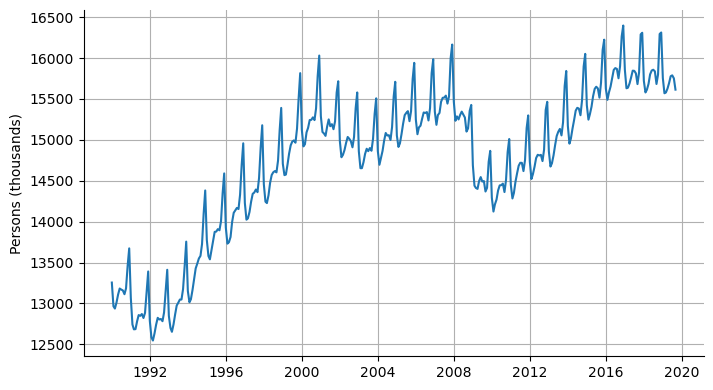

In [23]:
fig, ax = plt.subplots()
ax.plot(us_retail_emp.Employed)
ax.set(ylabel='Persons (thousands)')
ax.grid()

In [24]:
fit = sm.tsa.STL(us_retail_emp.Employed).fit()

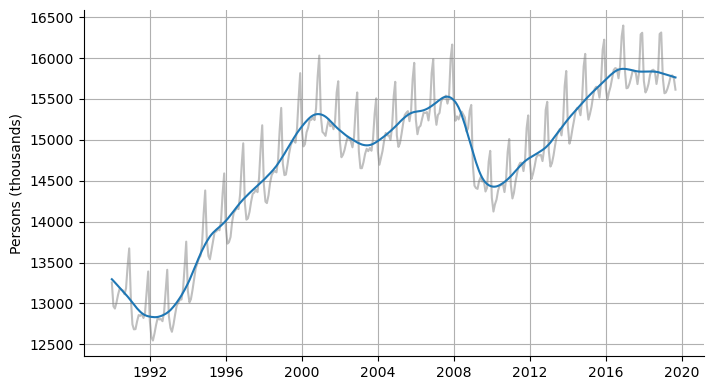

In [25]:
fig, ax = plt.subplots()
ax.plot(us_retail_emp.Employed, color='.5', alpha=.5)
ax.plot(fit.trend)
ax.set(ylabel='Persons (thousands)')
ax.grid()

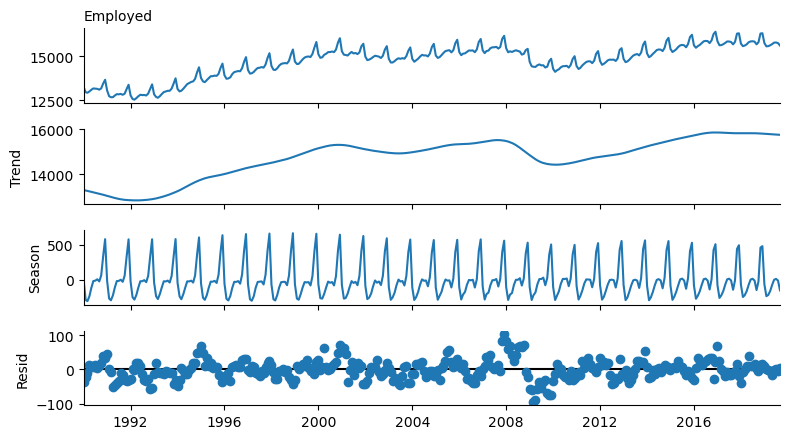

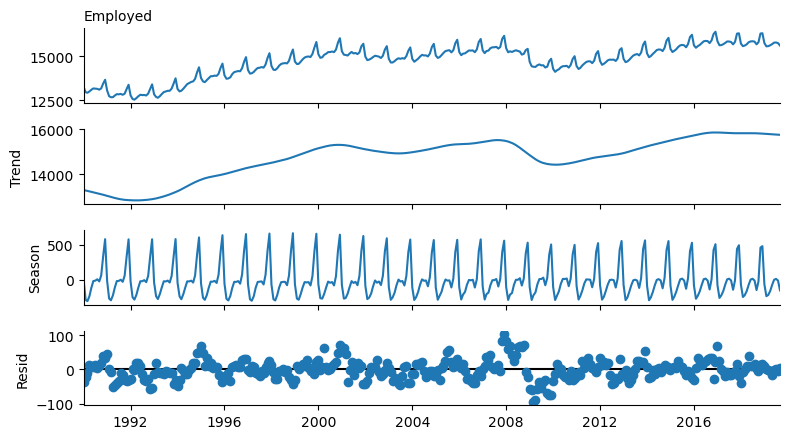

In [26]:
fit.plot()

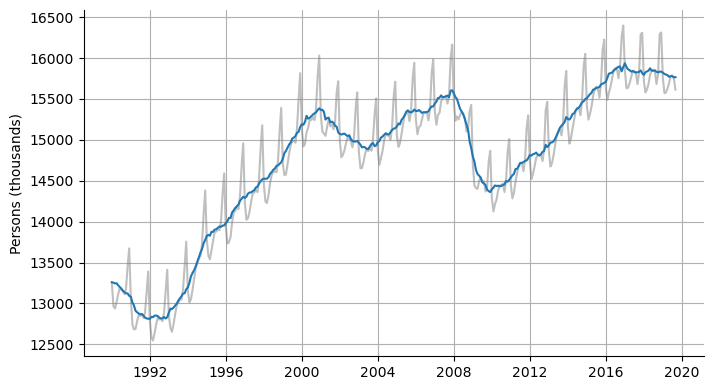

In [27]:
fig, ax = plt.subplots()
ax.plot(us_retail_emp.Employed, color='.5', alpha=.5)
ax.plot(us_retail_emp.Employed - fit.seasonal)
ax.set(ylabel='Persons (thousands)')
ax.grid()

## Moving averages

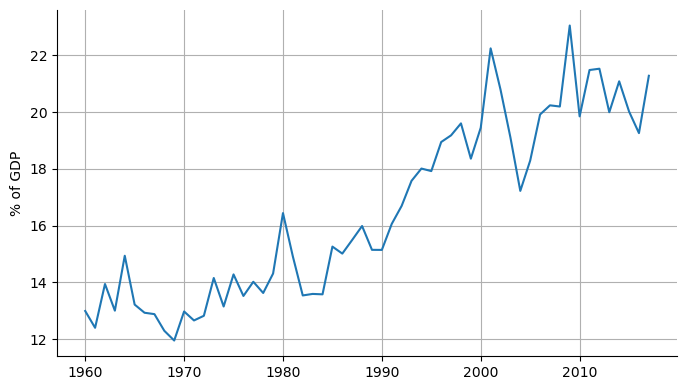

In [28]:
fig, ax = plt.subplots()
ax.plot(aus_economy.Exports)
ax.set(ylabel='% of GDP')
ax.grid()

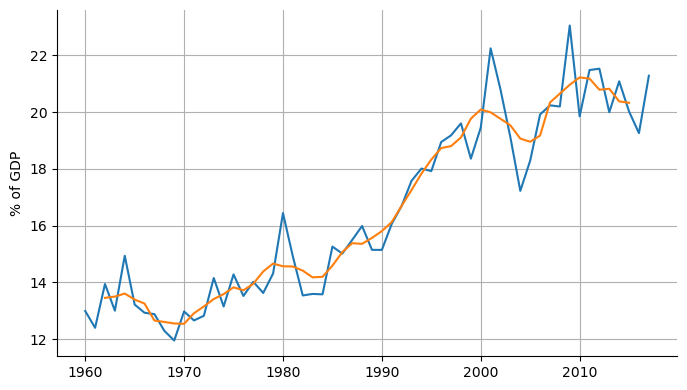

In [29]:
fig, ax = plt.subplots()
ax.plot(aus_economy.Exports)
ax.plot(aus_economy.Exports.rolling(5, center=True).mean())
ax.set(ylabel='% of GDP')
ax.grid()

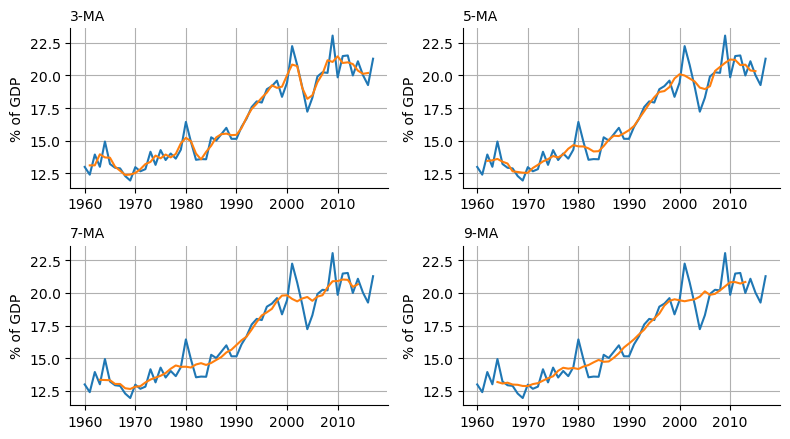

In [30]:
fig, ax = plt.subplots(2, 2)
rolls = 3, 5, 7, 9
for (ax, roll) in zip(ax.ravel(), rolls):
    ax.plot(aus_economy.Exports)
    ax.plot(aus_economy.Exports.rolling(roll, center=True).mean())
    ax.set(ylabel='% of GDP', title=f'{roll}-MA')
    ax.grid()
plt.tight_layout()

### Moving averages of moving averages

In [31]:
(aus_prod
 .Beer
 .rolling(4, center=True).mean()
 .rolling(2, center=True).mean())

Date
1956-01-01        NaN
1956-04-01        NaN
1956-07-01        NaN
1956-10-01    255.250
1957-01-01    254.375
               ...   
2009-04-01    428.875
2009-07-01    430.000
2009-10-01    429.875
2010-01-01    426.750
2010-04-01        NaN
Name: Beer, Length: 218, dtype: float64

## Estimating the trend_cycle with seasonal data

### Employmnet in the US retail sector

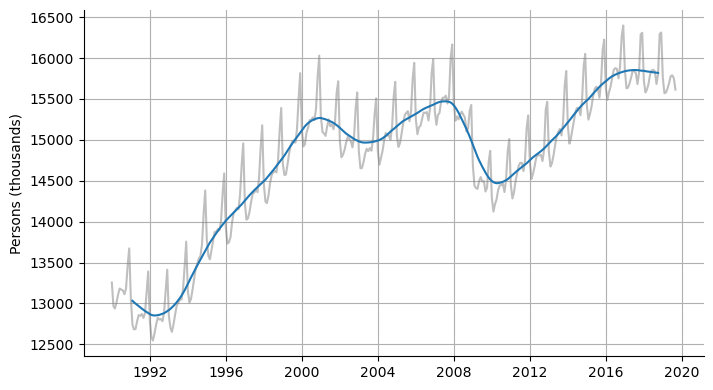

In [32]:
d = us_retail_emp
y = d.Employed.rolling(24, center=True).mean().rolling(2, center=True).mean()

fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5)
ax.plot(y)
ax.set(ylabel='Persons (thousands)')
ax.grid()

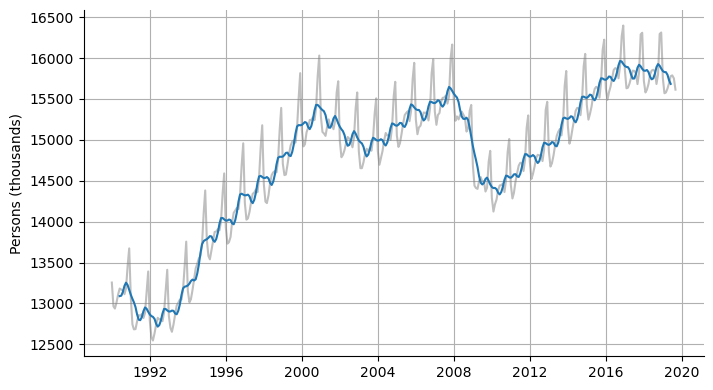

In [33]:
d = us_retail_emp
y = d.Employed.rolling(8, center=True).mean().rolling(2, center=True).mean()

fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5)
ax.plot(y)
ax.set(ylabel='Persons (thousands)')
ax.grid()

## Weighted moving averages

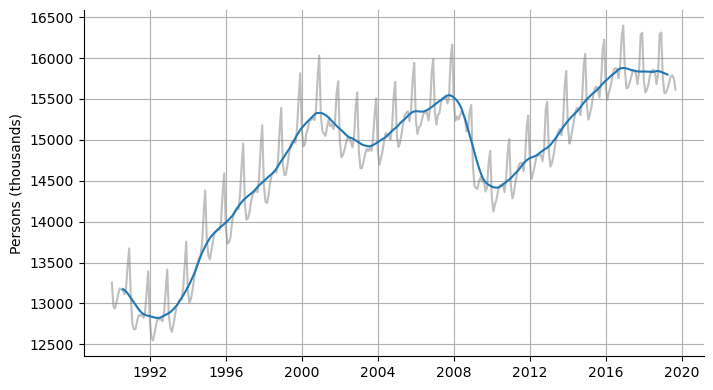

In [34]:
d = us_retail_emp
y = d.Employed.rolling(12, center=True, win_type='gaussian').mean(std=12).rolling(2, center=True).mean()

fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5)
ax.plot(y)
ax.set(ylabel='Persons (thousands)')
ax.grid()

## Classical Decomposition

### Additive decomposition

In [35]:
fit = fit_classical_additive = sm.tsa.seasonal_decompose(us_retail_emp.Employed)

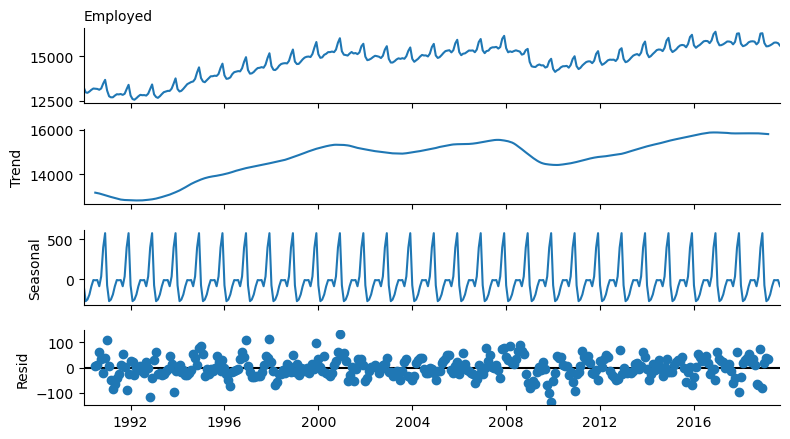

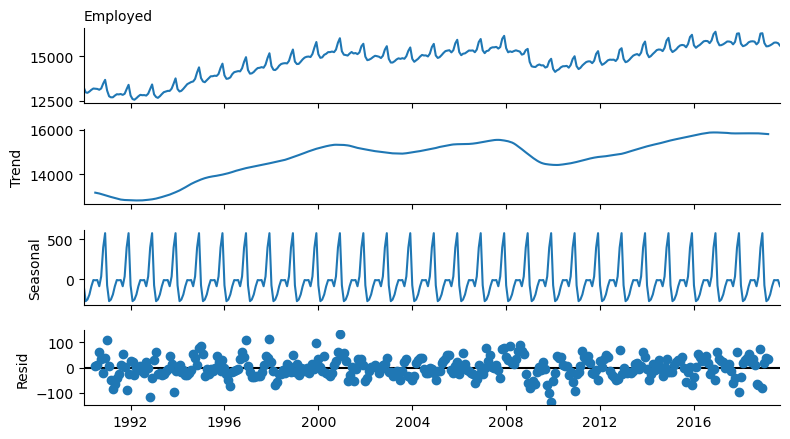

In [36]:
fit.plot()

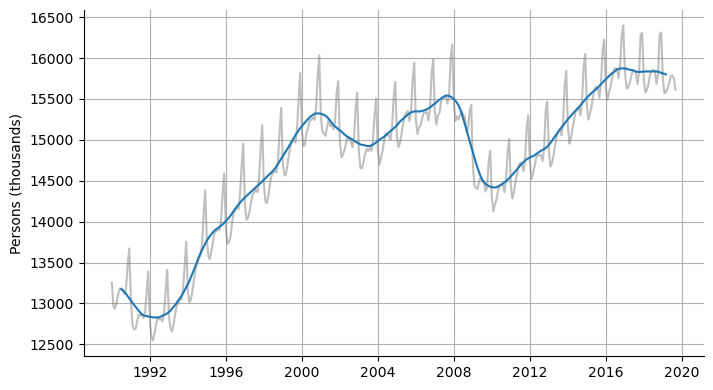

In [37]:
fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5)
ax.plot(fit.trend)
ax.set(ylabel='Persons (thousands)')
ax.grid()

### Multiplicative decomposition

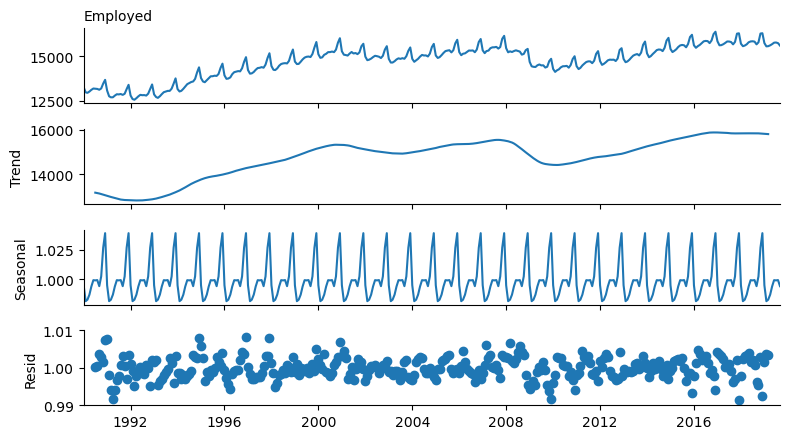

In [38]:
fig = sm.tsa.seasonal_decompose(us_retail_emp.Employed, model='multiplicative').plot()
fig.axes[-1].set(ylim=(.99, 1.01));

### X11 decompostion

In [39]:
fit = sm.tsa.seasonal_decompose(us_retail_emp.Employed, extrapolate_trend=10)

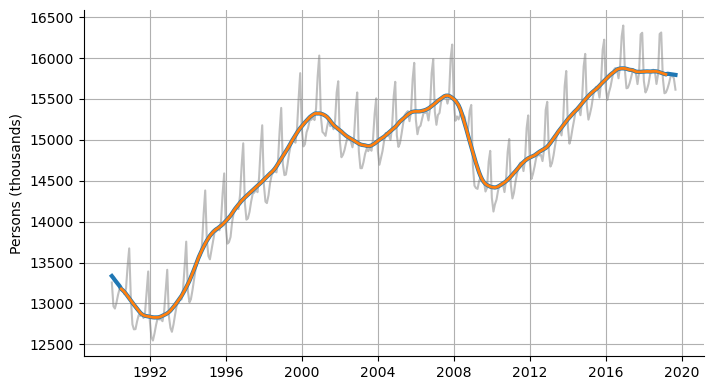

In [40]:
fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5)
ax.plot(fit.trend, lw=3)
ax.plot(fit_classical_additive.trend, lw=2)
ax.set(ylabel='Persons (thousands)')
ax.grid()

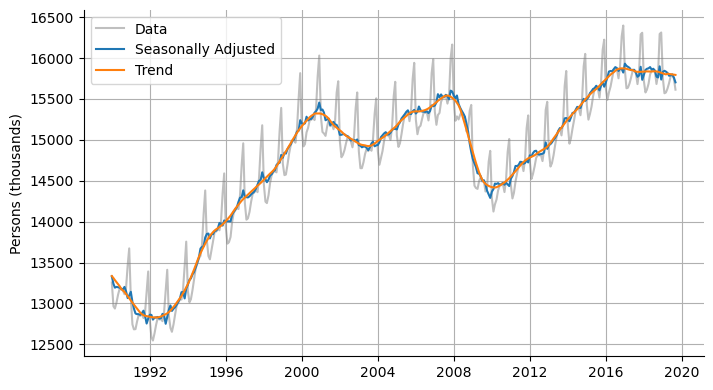

In [41]:
fig, ax = plt.subplots()
ax.plot(d.Employed, color='.5', alpha=.5, label='Data')
ax.plot(d.Employed - fit.seasonal, label='Seasonally Adjusted')
ax.plot(fit.trend, label='Trend')
ax.set(ylabel='Persons (thousands)')
ax.legend()
ax.grid()

In [42]:
d = fit.seasonal.to_frame().reset_index()
d = d.assign(year=d.date.dt.year, month=d.date.dt.month)

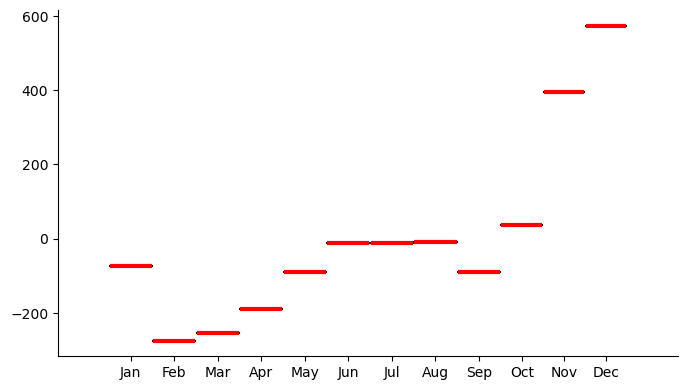

In [43]:
sm.graphics.tsa.month_plot(d.set_index('date').seasonal);

### SEATS decomposition

In [44]:
Y = us_retail_emp.Employed
Y.index.freq = 'MS'

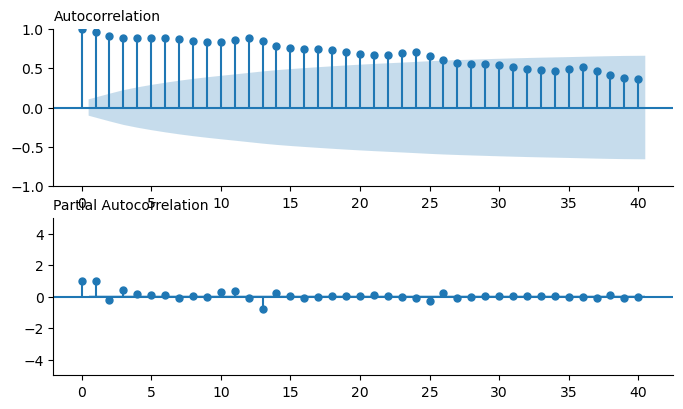

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y, lags=40, ax=ax2)
ax2.set(ylim=(-5,5));

### STL decompostion

In [46]:
fit = sm.tsa.STL(Y).fit()

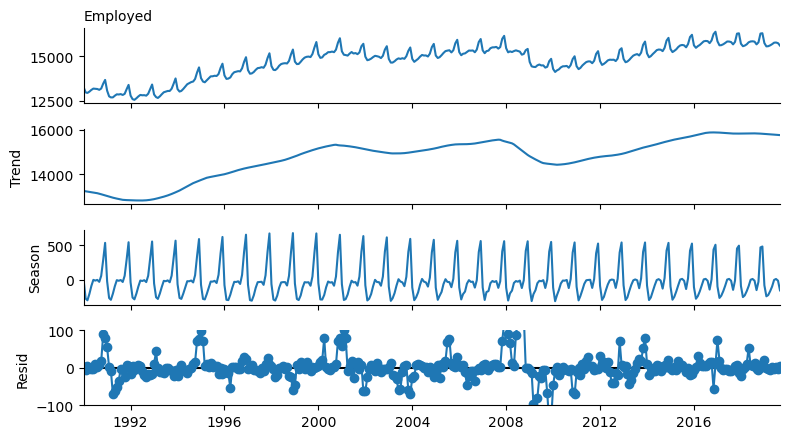

In [47]:
fit = sm.tsa.STL(Y, robust=True, trend=15).fit()
fig = fit.plot()
ax = fig.axes[-1]
ax.lines[0].set(linestyle='-')
ax.set(ylim=(-100, 100));